<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%9B%D0%B0%D0%B16_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92__4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.

Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних  
технік.
1. Завантаження та підготовка даних:
- Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn (наприклад, Boston Housing, California Housing) або будь-який датасет для регресії.
- Завантажте дані та розділіть їх на навчальну та тестову вибірки (рекомендується використовувати співвідношення 80/20 або 70/30).

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. Побудова регресійної моделі:
- Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
- Оцініть точність моделі на тестовій вибірці та визначте її продуктивність, використовуючи метрики якості регресії (наприклад, mean_squared_error, R^2).
3. Аналіз перенавчання:
- Перевірте наявність перенавчання, порівнюючи результати на навчальній та тестовій вибірках. Якщо модель показує значно кращі результати на навчальних даних, це може свідчити про перенавчання.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Навчальна вибірка - MSE: {mse_train}, R²: {r2_train}")
print(f"Тестова вибірка - MSE: {mse_test}, R²: {r2_test}")

Навчальна вибірка - MSE: 0.5179331255246699, R²: 0.6125511913966952
Тестова вибірка - MSE: 0.5558915986952442, R²: 0.575787706032451


4. Запобігання перенавчанню:
- Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge Regression або Lasso Regression.
- Перевірте роботу моделі з різними значеннями параметра регуляризації та  виберіть оптимальне значення.
- Застосуйте крос-валідацію для більш стабільної оцінки продуктивності моделі.

In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

alpha_values = {'alpha': [0.1, 1, 10, 100]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5)
ridge_cv.fit(X_train, y_train)

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5)
lasso_cv.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test))
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test))
print(f"Ridge MSE: {ridge_mse}, Lasso MSE: {lasso_mse}")

Ridge MSE: 0.5558879138674184, Lasso MSE: 0.6796290284328821


5. Оцінка результатів:
- Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з базовою моделлю.
- Проаналізуйте, як введення регуляризації та використання крос-валідації вплинули на якість моделі.
6. Візуалізація та висновки:
- Побудуйте графіки, що демонструють залежність помилки моделі від гіперпараметрів регуляризації.

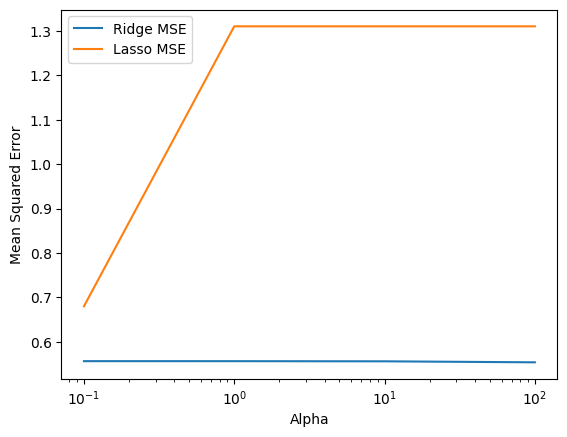

In [4]:
import matplotlib.pyplot as plt

alphas = [0.1, 1, 10, 100]
ridge_errors = [mean_squared_error(y_test, Ridge(alpha=a).fit(X_train, y_train).predict(X_test)) for a in alphas]
lasso_errors = [mean_squared_error(y_test, Lasso(alpha=a).fit(X_train, y_train).predict(X_test)) for a in alphas]

plt.plot(alphas, ridge_errors, label='Ridge MSE')
plt.plot(alphas, lasso_errors, label='Lasso MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.show()

Висновки:
Проаналізувавши значення MSE і R^2, зрозуміло що різниця між результатами навчальної та тестової вибірки невелика, що каже нам про те що модель не має суттєвого перенавчання.
Також, порівнявши регуляризовані моделі з базовою, видно що Ridge регресія працює майже на тому ж рівні з базовою моделлю, в той чс як регресія Lasso показала гірші результати.

Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.
Зробити висновки.

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
diabetes = load_diabetes()
X = diabetes.data

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

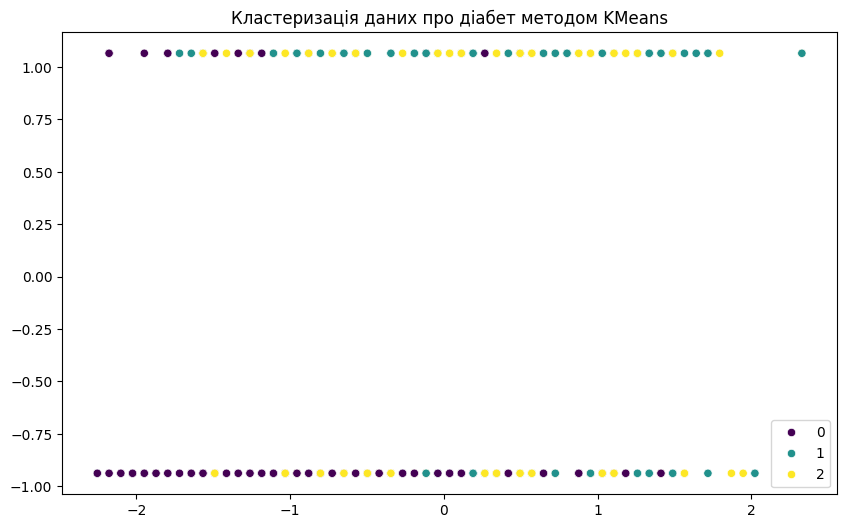

In [6]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Створення моделі KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Додавання кластерів до даних
clusters = kmeans.labels_

# Візуалізація кластерів (для перших двох компонентів)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("Кластеризація даних про діабет методом KMeans")
plt.show()

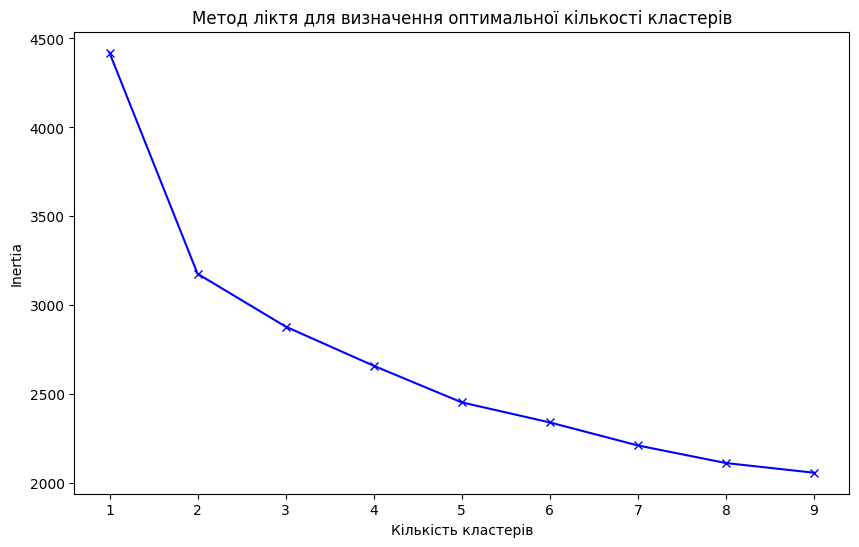

In [7]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()